# Demo : Learn how to do math calculations

Author: Jim Xie

Date:   2020-08-07

In [1]:
import sys
#!{sys.executable} -m pip install seaborn==0.9.0
import seaborn
print(seaborn.__version__)
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
#plt.figure(figsize=(15,10))

0.10.1


In [16]:
def random_data():
    x = random.randint(0,100)
    #x = random.random()
    return x

def generate_data(x1,x2):
    y = (x1 * x2)/2
    #y = (x1 + x2) /2
    return y

In [17]:
train_x = []
train_y = []
for i in range(20000):
    x1 = random_data()
    x2 = random_data()
    x = [x1,x2]
    train_x.append(x)
    y = generate_data(x1,x2)
    train_y.append(y)

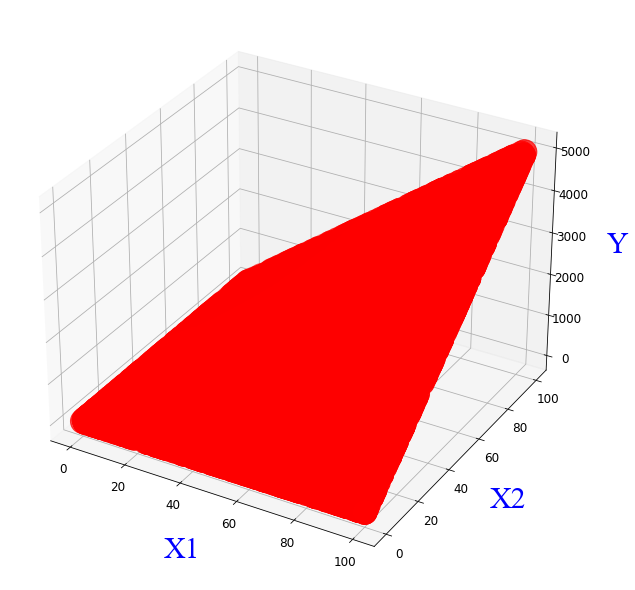

In [18]:
plt.style.use({'figure.figsize':(24, 8)})
fig = plt.figure()
ax = Axes3D(fig)
x1_axis = []
x2_axis = []
y_axis = []
for x,y in zip(train_x,train_y):
    x1_axis.append(x[0])
    x2_axis.append(x[1])
    y_axis.append(y) 
ax.scatter(x1_axis, x2_axis, y_axis,depthshade=True,s=600,c='r')
ax.ticklabel_format(style='plain',axis='both')    
font2 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 30,"color":"blue"}
ax.set_xlabel("X1",font2,labelpad=20)
ax.set_ylabel("X2",font2,labelpad=20)
ax.set_zlabel("Y",font2,labelpad=20)
ax.grid(False)
plt.grid(linestyle=':')
plt.tick_params(labelsize=12)
plt.show()

In [19]:
model = LinearRegression() 
model.fit(train_x,train_y)

LinearRegression()

In [20]:
test_x = []
test_y = []
for i in range(20):
    x1 = random_data()
    x2 = random_data()
    test_x.append([x1,x2])
    y = generate_data(x1,x2)
    test_y.append(y)
pred_y = model.predict(test_x)
#pred_y = pred_y - 10
print("x1    x2     y")
for x,y in zip(test_x,test_y):
    print(x[0],"  ",x[1],"    ",y)

x1    x2     y
4    17      34.0
13    52      338.0
32    66      1056.0
18    77      693.0
80    16      640.0
82    74      3034.0
55    22      605.0
26    94      1222.0
39    39      760.5
56    67      1876.0
87    22      957.0
98    71      3479.0
46    11      253.0
73    36      1314.0
33    96      1584.0
10    99      495.0
21    52      546.0
22    33      363.0
52    75      1950.0
82    31      1271.0


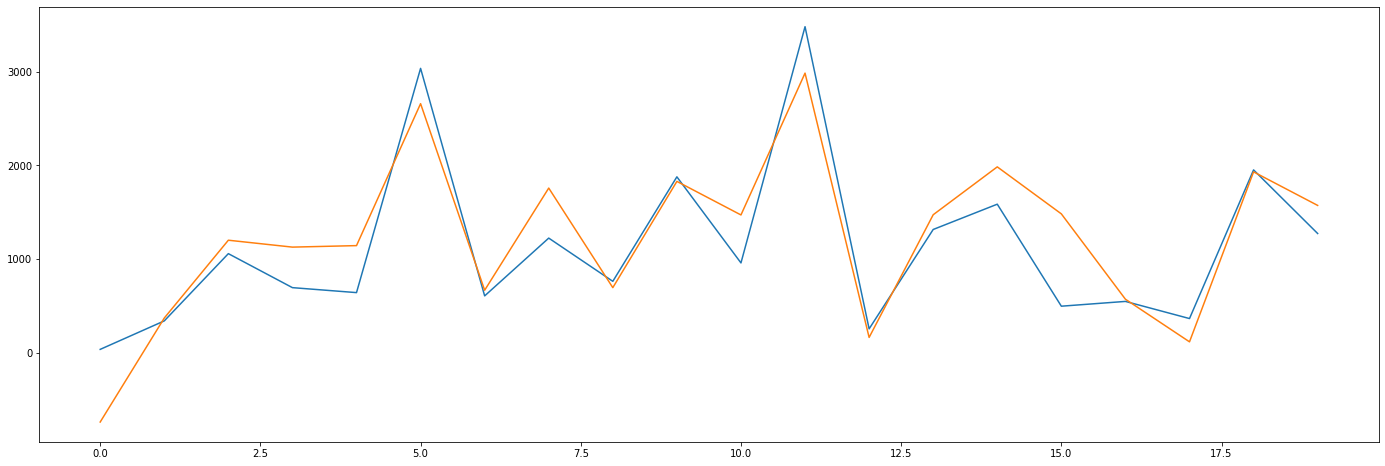

In [21]:
plt.plot(test_y)
plt.plot(pred_y)
plt.show()  

In [22]:
input_x1 = 10 #random_data()
input_x2 = 50 #random_data()
result = model.predict([[input_x1,input_x2]])
msg = "F(%.02f,%.02f)=%.02f"%(input_x1,input_x2,result[0])
print(msg)

F(10.00,50.00)=242.67


In [23]:
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

In [24]:
print(metrics.r2_score(test_y,pred_y,multioutput="uniform_average"))
print(metrics.r2_score(test_y,pred_y,multioutput="raw_values"))

0.7848484346266643
[0.78484843]


In [25]:
print(model.score(test_x,test_y))
print(metrics.r2_score(test_y, pred_y))

0.7848484346266643
0.7848484346266643


In [26]:
metrics.explained_variance_score(test_y,pred_y)

0.797213864580096

In [27]:
e = metrics.mean_absolute_error(test_y,pred_y)
print("%0.8f"%e)

310.22927643


In [28]:
e = metrics.mean_squared_error(test_y,pred_y)
print("%0.8f"%e)

166185.43293772


In [29]:
e = metrics.median_absolute_error(test_y,pred_y)
print("%0.8f"%e)

274.17812941
